# 0. npzファイルの読み込みと展開

In [1]:
#cmdやcondaでTensorflowをインストール
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import importlib

In [2]:
npz =  np.load('C:/my_comp_train_XY/my_comp_train_XY.npz')
X_train = npz['X']
y_train = npz['y']

 # 1. データをダウンロードする

In [3]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
y_train

array([0, 0, 0, ..., 9, 9, 9], dtype=uint8)

 # 2. データを分析する

 # 2-1. データラベルの分布の可視化

In [5]:
#ユニークな要素を引数return_countsでカウント
labels, label_count = np.unique(y_train, return_counts=True)
print(labels)
print(label_count)

[0 1 2 3 4 5 6 7 8 9]
[4146 3371 5362 4904 4089 3252 5326 5012 5851 4164]


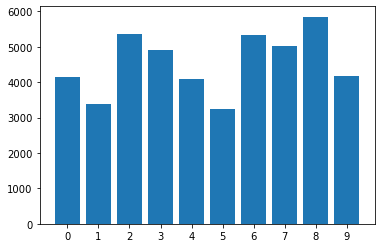

In [6]:
#0から9の画像の分布を表示
plt.bar(labels, label_count)
plt.xticks(range(0,10))
plt.show()

 # 2-2. データ値の範囲の可視化

In [7]:
print(X_train.shape)
print(y_train.shape)

(45477, 28, 28)
(45477,)


In [8]:
#ravel関数による一次元配列の返却
#データの数、高さ、幅の三次元
#今回は写真の枚数、ピクセルの位置を横に並べるイメージ
print(X_train.ravel().shape)

(35653968,)


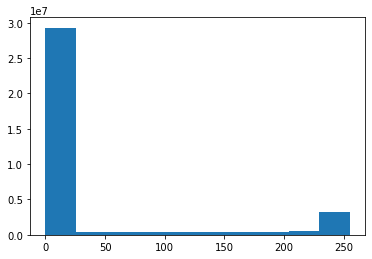

In [9]:
#縦軸：各データの中のピクセルの個数[10^7個]
plt.hist(X_train.ravel())
plt.show()

In [10]:
#欠損値の数の計上
np.isnan(X_train.ravel()).sum()

0

 # 2-3. 画像の表示

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt

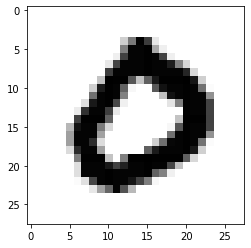

In [12]:
some_digit = X_train[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap='binary')
plt.show()

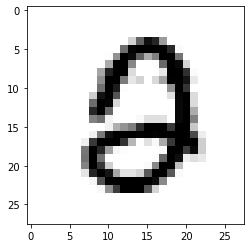

In [13]:
some_digit_01 = X_train[8468]
some_digit_01_image = some_digit_01.reshape(28, 28)
plt.imshow(some_digit_01_image, cmap='binary')
plt.show()

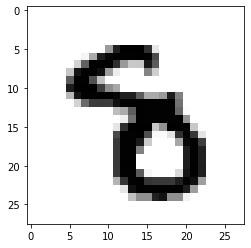

In [14]:
some_digit_02 = X_train[35469]
some_digit_02_image = some_digit_02.reshape(28, 28)
plt.imshow(some_digit_02_image, cmap='binary')
plt.show()

In [15]:
def show_image_by_label(X, y, target_label, show_num=6, figsize=(8,8), random=True):
    X_sub, y_sub= X[y==target_label], y[y==target_label]
    if random:
        rnd_idx = np.random.permutation(len(X_sub))[:show_num]
        X_sub, y_sub = X_sub[rnd_idx], y_sub[rnd_idx]
    X_sub, y_sub = X_sub[:show_num], y_sub[:show_num]
    
    rows, cols = np.ceil(show_num/2), 3
    plt.figure(figsize=figsize)
    print("Showing image with label:{}".format(target_label))
    for i, img in enumerate(X_sub):
        plt.subplot(rows, cols, i+1)
        plt.imshow(img, cmap="gray")
        plt.axis('off')
    plt.show()

Showing image with label:0


<ipython-input-15-6419b0dceb46>:12: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(rows, cols, i+1)


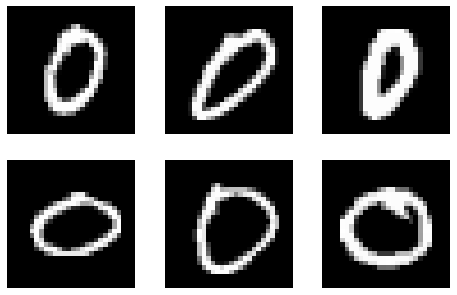

Showing image with label:1


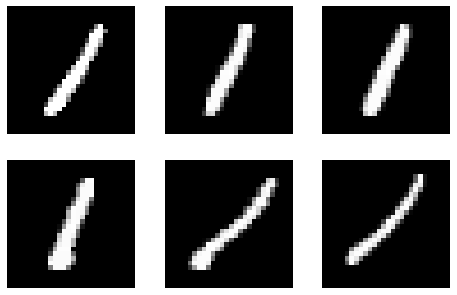

Showing image with label:2


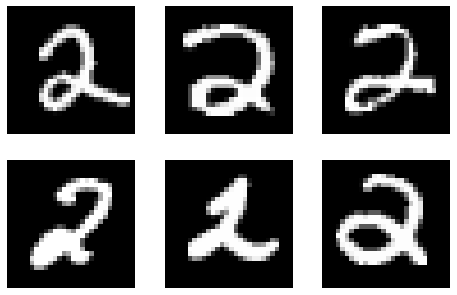

Showing image with label:3


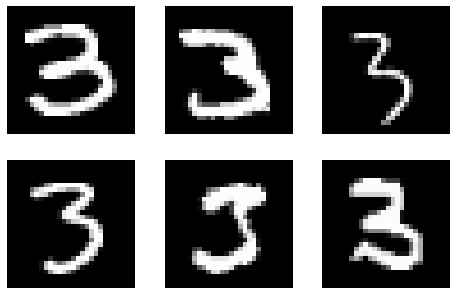

Showing image with label:4


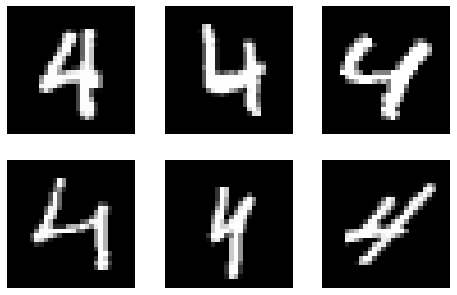

Showing image with label:5


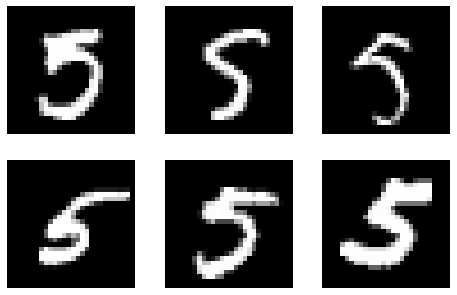

Showing image with label:6


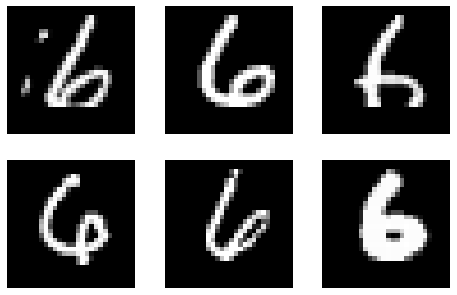

Showing image with label:7


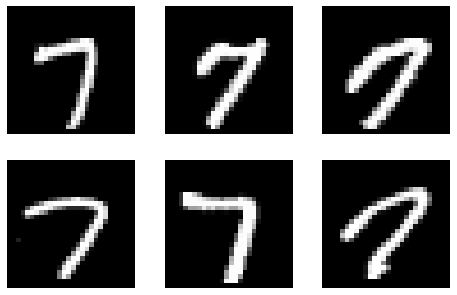

Showing image with label:8


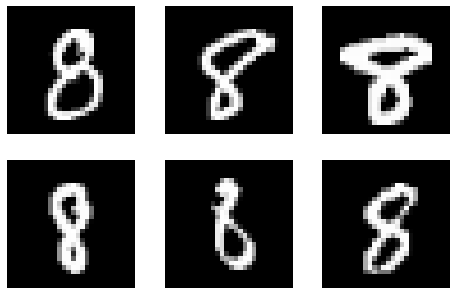

Showing image with label:9


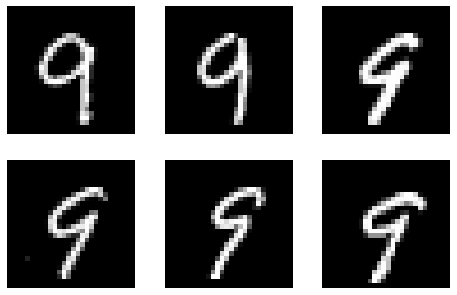

In [16]:
for label in np.unique(y_train):
    show_image_by_label(X_train, y_train, target_label=label)

 # 3. データを前処理する

 # 3-1. 訓練データとテストデータへの分類

In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [18]:
#npzファイルの読み込みと展開
npz = np.load('C:/my_comp_train_XY/my_comp_train_XY.npz')
X_train_raw = npz['X']
y_train_raw = npz['y']

 # 3-2. 標準化・データのレンジ

In [19]:
#ravel()で展開したXのデータを0.0から1.0に標準化
X_train_scaled = X_train_raw/255.
y_train_scaled = y_train_raw.copy()

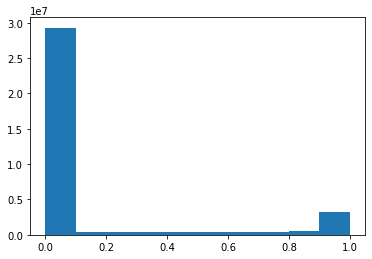

In [20]:
#縦軸：各データの中のピクセルの個数[10^7個]
plt.hist(X_train_scaled.ravel())
plt.show()

In [21]:
#訓練データとテストデータに分ける(引数stratify)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_scaled, y_train_scaled,
                                                      shuffle=True, test_size=0.15, stratify=y_train_scaled)

In [22]:
print("Train data shape, X_train.shape:{} y_train.shape:{}".format(X_train.shape, y_train.shape))
print("Train data shape, X_valid.shape:{} y_valid.shape:{}".format(X_valid.shape, y_valid.shape))

Train data shape, X_train.shape:(38655, 28, 28) y_train.shape:(38655,)
Train data shape, X_valid.shape:(6822, 28, 28) y_valid.shape:(6822,)


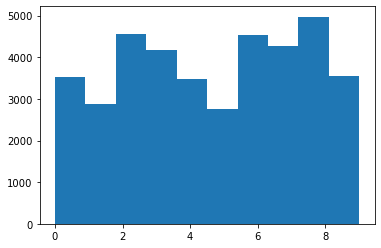

In [23]:
plt.hist(y_train)
plt.show()

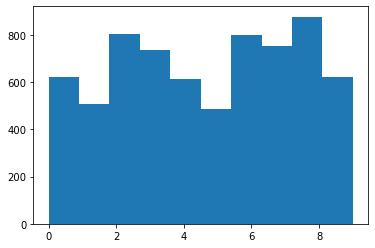

In [24]:
plt.hist(y_valid)
plt.show()

 # 4. 訓練データでモデルを学習する

# 4-1. モデルの選択

In [25]:
#ロジスティック回帰を用いる
X_train_logireg, X_valid_logireg = X_train.reshape(-1, 28*28),X_valid.reshape(-1, 28*28)
print(X_train_logireg.shape)
print(X_valid_logireg.shape)

(38655, 784)
(6822, 784)


In [26]:
#モデルのインスタンス化(テキストp74)
model_logireg = LogisticRegression(verbose=1)

In [27]:
model_logireg.fit(X_train_logireg, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   23.5s finished


LogisticRegression(verbose=1)

 # 5. 精度を評価する

In [28]:
#訓練データとテストデータの精度
y_logireg_train_predictions = model_logireg.predict(X_train_logireg)
y_logireg_valid_predictions = model_logireg.predict(X_valid_logireg)

accuracy_logireg_train = accuracy_score(y_train, y_logireg_train_predictions)
accuracy_logireg_valid = accuracy_score(y_valid, y_logireg_valid_predictions)

print("Train accuracy", accuracy_logireg_train)
print("Valid accuracy", accuracy_logireg_valid)

Train accuracy 0.9382744793687751
Valid accuracy 0.9249486953972442


In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [30]:
#精度を混同行列で評価する
matrix_logireg_valid = confusion_matrix(y_valid, y_logireg_valid_predictions)

In [31]:
matrix_logireg_valid

array([[592,   0,   6,   0,   2,   8,   4,   2,   7,   1],
       [  1, 491,   6,   2,   0,   0,   1,   1,   4,   0],
       [  2,   8, 730,  11,   7,   4,  14,   8,  18,   2],
       [  2,   4,  19, 653,   1,  22,   2,   3,  24,   6],
       [  1,   1,   4,   1, 565,   2,  10,   2,   6,  21],
       [  3,   0,   5,  20,   4, 422,   7,   4,  20,   3],
       [  8,   2,   7,   1,   9,   2, 765,   0,   5,   0],
       [  1,   0,   5,   2,   5,   2,   1, 720,   0,  16],
       [  8,   5,   5,  13,   7,  12,   8,   3, 812,   5],
       [  2,   1,   2,   6,  21,   4,   1,  23,   4, 560]], dtype=int64)

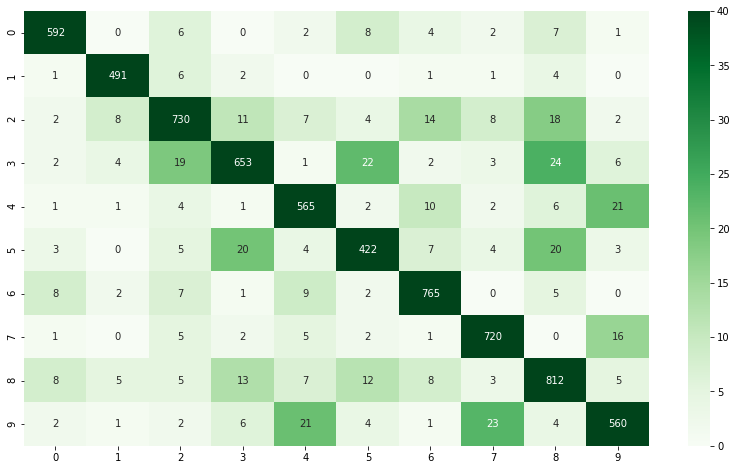

In [32]:
#ヒートマップによる二次元データの可視化
#テストデータy_validが縦軸、予測値y_logireg_valid_predictionsが横軸
#scikit-learnのドキュメントを参照にすること
plt.figure(figsize=(14, 8))
sns.heatmap(matrix_logireg_valid, annot=True, fmt='g', cmap='Greens', vmin=0, vmax=40)
plt.show()

 # Ramdom Forestを用いた場合

In [33]:
X_train_rndforest, X_valid_rndforest = X_train.reshape(-1, 28*28), X_valid.reshape(-1, 28*28)
print(X_train_rndforest.shape)
print(X_valid_rndforest.shape)

(38655, 784)
(6822, 784)


In [34]:
#モデルのインスタンス化(テキストp74)
model_rndforest = RandomForestClassifier()

In [35]:
model_rndforest.fit(X_train_rndforest, y_train)

RandomForestClassifier()

In [36]:
#訓練データとテストデータの精度
y_rndforest_train_predictions = model_rndforest.predict(X_train_rndforest)
y_rndforest_valid_predictions = model_rndforest.predict(X_valid_rndforest)

accuracy_rndforest_train = accuracy_score(y_train, y_rndforest_train_predictions)
accuracy_rndforest_valid = accuracy_score(y_valid, y_rndforest_valid_predictions)

print("Train accuracy", accuracy_rndforest_train)
print("Valid accuracy", accuracy_rndforest_valid)

Train accuracy 1.0
Valid accuracy 0.9662855467604808


In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [38]:
#精度を混同行列で評価する
matrix_rndforest_valid = confusion_matrix(y_valid, y_rndforest_valid_predictions)

In [39]:
matrix_rndforest_valid

array([[606,   0,   1,   1,   2,   0,   3,   1,   7,   1],
       [  0, 496,   5,   0,   0,   0,   2,   1,   1,   1],
       [  4,   0, 784,   2,   2,   0,   3,   5,   4,   0],
       [  0,   0,  15, 692,   0,   4,   3,   3,  16,   3],
       [  1,   0,   1,   0, 591,   0,   5,   1,   2,  12],
       [  4,   0,   2,   4,   1, 464,   3,   1,   7,   2],
       [  7,   0,   0,   0,   2,   1, 784,   0,   5,   0],
       [  0,   0,   8,   1,   4,   0,   0, 730,   2,   7],
       [  3,   0,   4,   1,   4,   1,   4,   2, 851,   8],
       [  3,   0,   0,   5,   8,   1,   0,  11,   2, 594]], dtype=int64)

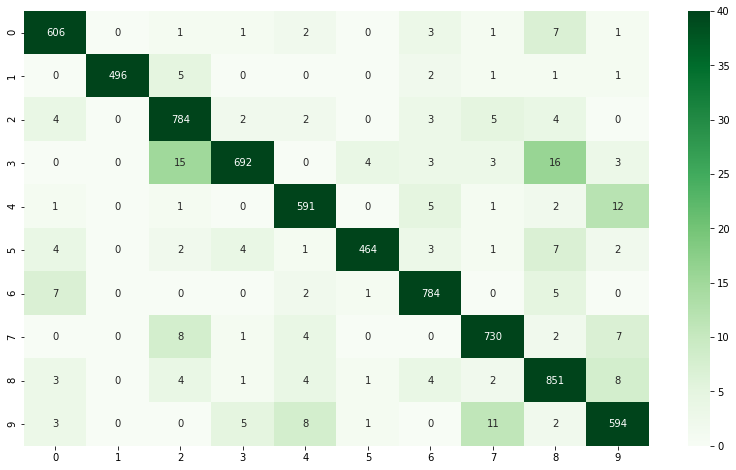

In [40]:
#ヒートマップによる二次元データの可視化
#テストデータy_validが縦軸、予測値y_logireg_valid_predictionsが横軸
#scikit-learnのドキュメントを参照にすること
plt.figure(figsize=(14, 8))
sns.heatmap(matrix_rndforest_valid, annot=True, fmt='g', cmap='Greens', vmin=0, vmax=40)
plt.show()

# 2モデルの比較(logireg & rndforest)

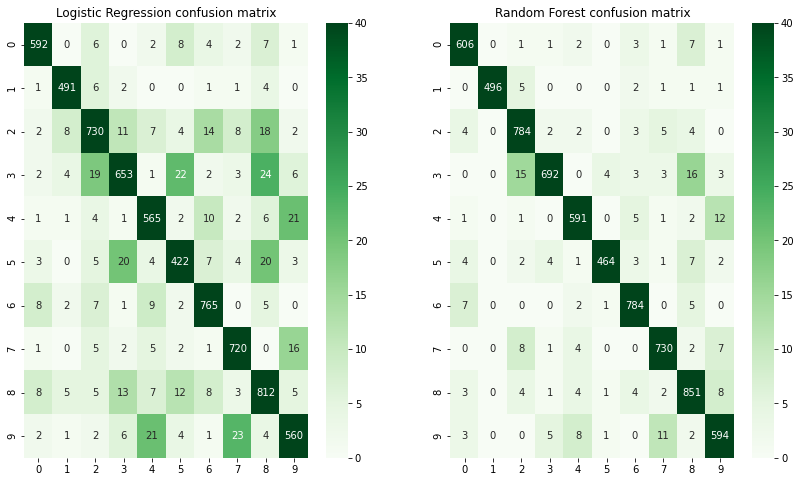

In [41]:
fig, axs = plt.subplots(1, 2, figsize=(14, 8))

map_min, map_max = 0, 40

sns.heatmap(matrix_logireg_valid, annot=True, fmt='g', cmap='Greens', vmin=map_min, vmax=map_max, ax=axs[0])
sns.heatmap(matrix_rndforest_valid, annot=True, fmt='g', cmap='Greens', vmin=map_min, vmax=map_max, ax=axs[1])

axs[0].set_title("Logistic Regression confusion matrix")
axs[1].set_title("Random Forest confusion matrix")
plt.show()

# 6. 再調整

# 6-1. グリッドサーチの総当たりの範囲

In [42]:
#cmdやcondaでTensorflowをインストール

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score, make_scorer,
    confusion_matrix,
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [43]:
npz = np.load('C:/my_comp_train_XY/my_comp_train_XY.npz')
X_raw = npz['X']
y_raw = npz['y']

In [44]:
#データの前処理
#訓練データとテストデータに分ける(引数stratify)
X_train_adj, X_valid_adj, y_train_adj, y_valid_adj = train_test_split(X_raw, y_raw,
                                                      shuffle=True, test_size=0.15, stratify=y_raw)
print("Train data shape, X_train.shape:{} y_train.shape:{}".format(X_train_adj.shape, y_train_adj.shape))
print("Train data shape, X_valid.shape:{} y_valid.shape:{}".format(X_valid_adj.shape, y_valid_adj.shape))

Train data shape, X_train.shape:(38655, 28, 28) y_train.shape:(38655,)
Train data shape, X_valid.shape:(6822, 28, 28) y_valid.shape:(6822,)


In [45]:
#ravel()で展開したXのデータを0.0から1.0に標準化
X_train = (X_train_adj/255.).reshape(-1, 28*28)
X_valid = (X_valid_adj/255.).reshape(-1, 28*28)
y_train = y_train_adj.copy().reshape(-1, 1)
y_valid = y_valid_adj.copy().reshape(-1, 1)

 # グリッドサーチ

In [46]:
logireg = LogisticRegression()

param_grid = {
    "penalty":["l1", "l2"],
    "C":[0.01, 0.1, 0.5, 1.0, 1.5, 2.0, 3.0],
}

scoring = {
    "accuracy": make_scorer(accuracy_score),
    "recall": make_scorer(recall_score, average="micro"),
    "precision": make_scorer(precision_score, average="micro"), 
    "f1": make_scorer(f1_score, average="micro"),
}

#Closs Validationの分割数(デフォルト値は3)
cv = 5
#最良だったパラメタを使って学習データ全体で再学習するかどうか
refit = False
#トレーニングスコアを含むかどうか
return_train_score = True
#ログ出力レベル
verbose = 3

In [47]:
grid_search_v1 = GridSearchCV(
    logireg,
    param_grid,
    scoring=scoring,
    cv=cv,
    refit=refit, 
    return_train_score=return_train_score,
    verbose=verbose)

In [48]:
grid_search_v1.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV] C=0.01, penalty=l1 ..............................................
[CV]  C=0.01, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=0.01, penalty=l1 ..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this 

[CV]  C=0.01, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=0.01, penalty=l1 ..............................................
[CV]  C=0.01, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s



[CV] C=0.01, penalty=l1 ..............................................
[CV]  C=0.01, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=0.01, penalty=l1 ..............................................
[CV]  C=0.01, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=0.01, penalty=l2 ..............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.01, penalty=l2, accuracy=(train=0.916, test=0.904), f1=(train=0.916, test=0.904), precision=(train=0.916, test=0.904), recall=(train=0.916, test=0.904), total=  18.5s
[CV] C=0.01, penalty=l2 ..............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.01, penalty=l2, accuracy=(train=0.913, test=0.915), f1=(train=0.913, test=0.915), precision=(train=0.913, test=0.915), recall=(train=0.913, test=0.915), total=  18.9s
[CV] C=0.01, penalty=l2 ..............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.01, penalty=l2, accuracy=(train=0.916, test=0.904), f1=(train=0.916, test=0.904), precision=(train=0.916, test=0.904), recall=(train=0.916, test=0.904), total=  18.7s
[CV] C=0.01, penalty=l2 ..............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.01, penalty=l2, accuracy=(train=0.915, test=0.909), f1=(train=0.915, test=0.909), precision=(train=0.915, test=0.909), recall=(train=0.915, test=0.909), total=  18.1s
[CV] C=0.01, penalty=l2 ..............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.01, penalty=l2, accuracy=(train=0.915, test=0.916), f1=(train=0.915, test=0.916), precision=(train=0.915, test=0.916), recall=(train=0.915, test=0.916), total=  18.5s
[CV] C=0.1, penalty=l1 ...............................................
[CV]  C=0.1, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=0.1, penalty=l1 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=0.1, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=0.1, penalty=l1 ...............................................
[CV]  C=0.1, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=0.1, penalty=l1 ...............................................
[CV]  C=0.1, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=0.1, penalty=l1 ...............................................
[CV]  C=0.1, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=0.1, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.1, penalty=l2, accuracy=(train=0.934, test=0.916), f1=(train=0.934, test=0.916), precision=(train=0.934, test=0.916), recall=(train=0.934, test=0.916), total=  18.6s
[CV] C=0.1, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.1, penalty=l2, accuracy=(train=0.934, test=0.922), f1=(train=0.934, test=0.922), precision=(train=0.934, test=0.922), recall=(train=0.934, test=0.922), total=  18.7s
[CV] C=0.1, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.1, penalty=l2, accuracy=(train=0.935, test=0.915), f1=(train=0.935, test=0.915), precision=(train=0.935, test=0.915), recall=(train=0.935, test=0.915), total=  18.9s
[CV] C=0.1, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.1, penalty=l2, accuracy=(train=0.934, test=0.920), f1=(train=0.934, test=0.920), precision=(train=0.934, test=0.920), recall=(train=0.934, test=0.920), total=  19.2s
[CV] C=0.1, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.1, penalty=l2, accuracy=(train=0.934, test=0.924), f1=(train=0.934, test=0.924), precision=(train=0.934, test=0.924), recall=(train=0.934, test=0.924), total=  19.2s
[CV] C=0.5, penalty=l1 ...............................................
[CV]  C=0.5, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=0.5, penalty=l1 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=0.5, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=0.5, penalty=l1 ...............................................
[CV]  C=0.5, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=0.5, penalty=l1 ...............................................
[CV]  C=0.5, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=0.5, penalty=l1 ...............................................
[CV]  C=0.5, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=0.5, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.5, penalty=l2, accuracy=(train=0.940, test=0.918), f1=(train=0.940, test=0.918), precision=(train=0.940, test=0.918), recall=(train=0.940, test=0.918), total=  19.2s
[CV] C=0.5, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.5, penalty=l2, accuracy=(train=0.940, test=0.921), f1=(train=0.940, test=0.921), precision=(train=0.940, test=0.921), recall=(train=0.940, test=0.921), total=  19.8s
[CV] C=0.5, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.5, penalty=l2, accuracy=(train=0.942, test=0.915), f1=(train=0.942, test=0.915), precision=(train=0.942, test=0.915), recall=(train=0.942, test=0.915), total=  20.1s
[CV] C=0.5, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.5, penalty=l2, accuracy=(train=0.941, test=0.918), f1=(train=0.941, test=0.918), precision=(train=0.941, test=0.918), recall=(train=0.941, test=0.918), total=  19.3s
[CV] C=0.5, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.5, penalty=l2, accuracy=(train=0.941, test=0.924), f1=(train=0.941, test=0.924), precision=(train=0.941, test=0.924), recall=(train=0.941, test=0.924), total=  19.4s
[CV] C=1.0, penalty=l1 ...............................................
[CV]  C=1.0, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=1.0, penalty=l1 ...............................................

C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"



[CV]  C=1.0, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=1.0, penalty=l1 ...............................................
[CV]  C=1.0, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=1.0, penalty=l1 ...............................................
[CV]  C=1.0, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=1.0, penalty=l1 ...............................................
[CV]  C=1.0, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=1.0, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1.0, penalty=l2, accuracy=(train=0.941, test=0.918), f1=(train=0.941, test=0.918), precision=(train=0.941, test=0.918), recall=(train=0.941, test=0.918), total=  20.3s
[CV] C=1.0, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1.0, penalty=l2, accuracy=(train=0.942, test=0.920), f1=(train=0.942, test=0.920), precision=(train=0.942, test=0.920), recall=(train=0.942, test=0.920), total=  19.2s
[CV] C=1.0, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1.0, penalty=l2, accuracy=(train=0.943, test=0.914), f1=(train=0.943, test=0.914), precision=(train=0.943, test=0.914), recall=(train=0.943, test=0.914), total=  18.2s
[CV] C=1.0, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1.0, penalty=l2, accuracy=(train=0.942, test=0.917), f1=(train=0.942, test=0.917), precision=(train=0.942, test=0.917), recall=(train=0.942, test=0.917), total=  18.7s
[CV] C=1.0, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1.0, penalty=l2, accuracy=(train=0.941, test=0.924), f1=(train=0.941, test=0.924), precision=(train=0.941, test=0.924), recall=(train=0.941, test=0.924), total=  18.7s
[CV] C=1.5, penalty=l1 ...............................................
[CV]  C=1.5, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=1.5, penalty=l1 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=1.5, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=1.5, penalty=l1 ...............................................
[CV]  C=1.5, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=1.5, penalty=l1 ...............................................
[CV]  C=1.5, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=1.5, penalty=l1 ...............................................
[CV]  C=1.5, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=1.5, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1.5, penalty=l2, accuracy=(train=0.942, test=0.918), f1=(train=0.942, test=0.918), precision=(train=0.942, test=0.918), recall=(train=0.942, test=0.918), total=  19.4s
[CV] C=1.5, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1.5, penalty=l2, accuracy=(train=0.943, test=0.920), f1=(train=0.943, test=0.920), precision=(train=0.943, test=0.920), recall=(train=0.943, test=0.920), total=  19.5s
[CV] C=1.5, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1.5, penalty=l2, accuracy=(train=0.943, test=0.914), f1=(train=0.943, test=0.914), precision=(train=0.943, test=0.914), recall=(train=0.943, test=0.914), total=  19.0s
[CV] C=1.5, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1.5, penalty=l2, accuracy=(train=0.943, test=0.916), f1=(train=0.943, test=0.916), precision=(train=0.943, test=0.916), recall=(train=0.943, test=0.916), total=  18.3s
[CV] C=1.5, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1.5, penalty=l2, accuracy=(train=0.942, test=0.923), f1=(train=0.942, test=0.923), precision=(train=0.942, test=0.923), recall=(train=0.942, test=0.923), total=  18.9s
[CV] C=2.0, penalty=l1 ...............................................
[CV]  C=2.0, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=2.0, penalty=l1 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=2.0, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=2.0, penalty=l1 ...............................................
[CV]  C=2.0, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=2.0, penalty=l1 ...............................................
[CV]  C=2.0, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=2.0, penalty=l1 ...............................................
[CV]  C=2.0, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=2.0, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=2.0, penalty=l2, accuracy=(train=0.941, test=0.918), f1=(train=0.941, test=0.918), precision=(train=0.941, test=0.918), recall=(train=0.941, test=0.918), total=  19.1s
[CV] C=2.0, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=2.0, penalty=l2, accuracy=(train=0.942, test=0.919), f1=(train=0.942, test=0.919), precision=(train=0.942, test=0.919), recall=(train=0.942, test=0.919), total=  18.7s
[CV] C=2.0, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=2.0, penalty=l2, accuracy=(train=0.943, test=0.912), f1=(train=0.943, test=0.912), precision=(train=0.943, test=0.912), recall=(train=0.943, test=0.912), total=  18.5s
[CV] C=2.0, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=2.0, penalty=l2, accuracy=(train=0.944, test=0.915), f1=(train=0.944, test=0.915), precision=(train=0.944, test=0.915), recall=(train=0.944, test=0.915), total=  18.7s
[CV] C=2.0, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=2.0, penalty=l2, accuracy=(train=0.942, test=0.922), f1=(train=0.942, test=0.922), precision=(train=0.942, test=0.922), recall=(train=0.942, test=0.922), total=  18.7s
[CV] C=3.0, penalty=l1 ...............................................
[CV]  C=3.0, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=3.0, penalty=l1 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


[CV]  C=3.0, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=3.0, penalty=l1 ...............................................
[CV]  C=3.0, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=3.0, penalty=l1 ...............................................
[CV]  C=3.0, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=3.0, penalty=l1 ...............................................
[CV]  C=3.0, penalty=l1, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=3.0, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=3.0, penalty=l2, accuracy=(train=0.942, test=0.916), f1=(train=0.942, test=0.916), precision=(train=0.942, test=0.916), recall=(train=0.942, test=0.916), total=  18.3s
[CV] C=3.0, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=3.0, penalty=l2, accuracy=(train=0.941, test=0.920), f1=(train=0.941, test=0.920), precision=(train=0.941, test=0.920), recall=(train=0.941, test=0.920), total=  19.0s
[CV] C=3.0, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=3.0, penalty=l2, accuracy=(train=0.944, test=0.912), f1=(train=0.944, test=0.912), precision=(train=0.944, test=0.912), recall=(train=0.944, test=0.912), total=  18.6s
[CV] C=3.0, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=3.0, penalty=l2, accuracy=(train=0.944, test=0.915), f1=(train=0.944, test=0.915), precision=(train=0.944, test=0.915), recall=(train=0.944, test=0.915), total=  19.5s
[CV] C=3.0, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=3.0, penalty=l2, accuracy=(train=0.942, test=0.921), f1=(train=0.942, test=0.921), precision=(train=0.942, test=0.921), recall=(train=0.942, test=0.921), total=  19.7s


[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed: 11.3min finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 0.5, 1.0, 1.5, 2.0, 3.0],
                         'penalty': ['l1', 'l2']},
             refit=False, return_train_score=True,
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1': make_scorer(f1_score, average=micro),
                      'precision': make_scorer(precision_score, average=micro),
                      'recall': make_scorer(recall_score, average=micro)},
             verbose=3)

In [49]:
grid_search_v1.cv_results_

{'mean_fit_time': array([ 0.1304729 , 18.47241707,  0.13023567, 18.868928  ,  0.11577692,
        19.49523416,  0.13158188, 18.96579189,  0.13193846, 18.93555083,
         0.13199792, 18.66190033,  0.12338271, 18.94748955]),
 'std_fit_time': array([0.00836327, 0.25355458, 0.01301521, 0.24082057, 0.01128904,
        0.32475546, 0.00710188, 0.70648492, 0.00737517, 0.41511465,
        0.00863372, 0.2212397 , 0.00676006, 0.52827374]),
 'mean_score_time': array([0.        , 0.06642885, 0.        , 0.0661365 , 0.        ,
        0.06440949, 0.        , 0.06917372, 0.        , 0.06243138,
        0.        , 0.06474133, 0.        , 0.06526484]),
 'std_score_time': array([0.        , 0.00331568, 0.        , 0.00320909, 0.        ,
        0.00700437, 0.        , 0.00420656, 0.        , 0.00406237,
        0.        , 0.00610344, 0.        , 0.0043319 ]),
 'param_C': masked_array(data=[0.01, 0.01, 0.1, 0.1, 0.5, 0.5, 1.0, 1.0, 1.5, 1.5,
                    2.0, 2.0, 3.0, 3.0],
              ma

In [50]:
params = grid_search_v1.cv_results_['params']
accuracy_list = grid_search_v1.cv_results_['mean_test_accuracy']

result_list = []
for param, accuracy in zip(params, accuracy_list):
    param["test_acc"] = accuracy
    result_list.append(param)

In [51]:
result_list

[{'C': 0.01, 'penalty': 'l1', 'test_acc': nan},
 {'C': 0.01, 'penalty': 'l2', 'test_acc': 0.9094036993920579},
 {'C': 0.1, 'penalty': 'l1', 'test_acc': nan},
 {'C': 0.1, 'penalty': 'l2', 'test_acc': 0.9193894709610658},
 {'C': 0.5, 'penalty': 'l1', 'test_acc': nan},
 {'C': 0.5, 'penalty': 'l2', 'test_acc': 0.9193118613374726},
 {'C': 1.0, 'penalty': 'l1', 'test_acc': nan},
 {'C': 1.0, 'penalty': 'l2', 'test_acc': 0.9185875048506015},
 {'C': 1.5, 'penalty': 'l1', 'test_acc': nan},
 {'C': 1.5, 'penalty': 'l2', 'test_acc': 0.9181218471090415},
 {'C': 2.0, 'penalty': 'l1', 'test_acc': nan},
 {'C': 2.0, 'penalty': 'l2', 'test_acc': 0.9172681412495148},
 {'C': 3.0, 'penalty': 'l1', 'test_acc': nan},
 {'C': 3.0, 'penalty': 'l2', 'test_acc': 0.9167248738843616}]

In [52]:
df_result_v1 = pd.DataFrame(result_list)

In [53]:
df_result_v1

,C,penalty,test_acc
0,0.01,l1,NaN
1,0.01,l2,0.909404
2,0.10,l1,NaN
3,0.10,l2,0.919389
4,0.50,l1,NaN
5,0.50,l2,0.919312
6,1.00,l1,NaN
7,1.00,l2,0.918588
8,1.50,l1,NaN
9,1.50,l2,0.918122


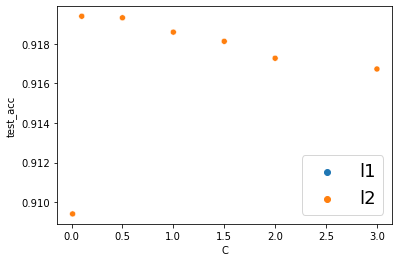

In [54]:
sns.scatterplot(data=df_result_v1, x="C", y="test_acc", hue="penalty")
plt.legend(loc= 'lower right', fontsize=18)
plt.show()